# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Compresive_strength_concrete.csv")
df.head().T

,0,1,2,3,4
Cement (component 1)(kg in a m^3 mixture),540.00,540.00,332.50,332.50,198.6
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.00,0.00,142.50,142.50,132.4
Fly Ash (component 3)(kg in a m^3 mixture),0.00,0.00,0.00,0.00,0.0
Water (component 4)(kg in a m^3 mixture),162.00,162.00,228.00,228.00,192.0
Superplasticizer (component 5)(kg in a m^3 mixture),2.50,2.50,0.00,0.00,0.0
Coarse Aggregate (component 6)(kg in a m^3 mixture),1040.00,1055.00,932.00,932.00,978.4
Fine Aggregate (component 7)(kg in a m^3 mixture),676.00,676.00,594.00,594.00,825.5
Age (day),28.00,28.00,270.00,365.00,360.0
"Concrete compressive strength(MPa, megapascals)",79.99,61.89,40.27,41.05,44.3


In [3]:
df.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [4]:
df.fillna(df.mean())

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size = 0.5, random_state =10)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size = 0.6, random_state =10)

print("X_train: ",X_train.shape)
print("X_val: ",X_val.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_val: ",y_val.shape)
print("y_test: ",y_test.shape)

X_train:  (515, 8)
X_val:  (206, 8)
X_test:  (309, 8)
y_train:  (515,)
y_val:  (206,)
y_test:  (309,)


In [7]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.fit(X_val)
X_test_std = scaler.fit(X_test)

In [8]:
X_train_std.shape[1]

8

In [9]:
model = tf.keras.Sequential()
model.add(Input(X_train_std.shape[1]))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss ='mae')

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100, verbose = 0)

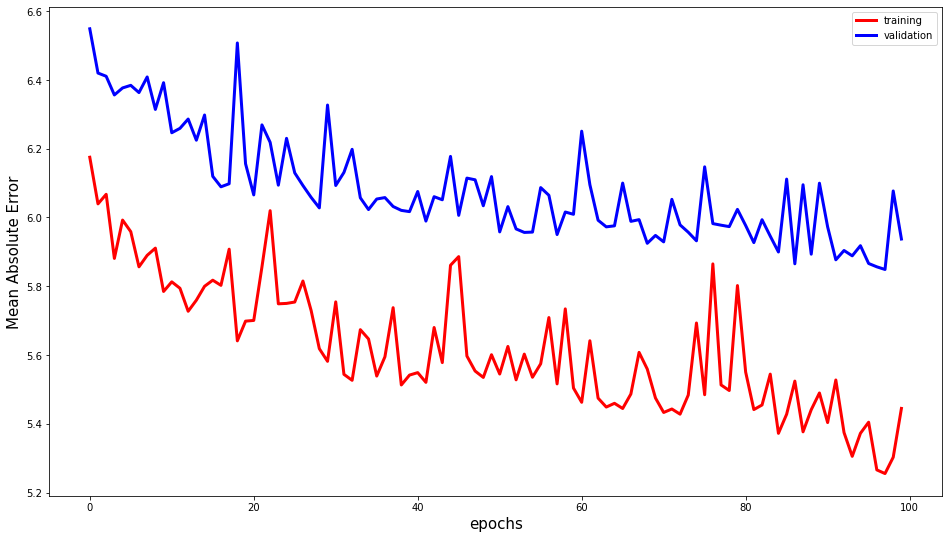

In [12]:
# Plot history

fig = plt.figure(figsize=(16,9))
plt.rcParams['axes.labelsize'] = 15
plt.plot(history.history['loss'],'red',linewidth=3.0, label ="training")
plt.plot(history.history['val_loss'],'blue',linewidth=3.0, label = "validation")
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [13]:
print(y_test[:5])
model.predict(X_test)

922    33.80
821    20.77
280    24.43
525    25.12
572    13.09
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


array([[36.009377 ],
       [18.531328 ],
       [22.627804 ],
       [36.101017 ],
       [17.75625  ],
       [24.252062 ],
       [45.93144  ],
       [28.574295 ],
       [15.54137  ],
       [30.241518 ],
       [36.764687 ],
       [41.61297  ],
       [14.623684 ],
       [40.312817 ],
       [19.464018 ],
       [30.445118 ],
       [28.931076 ],
       [24.194382 ],
       [39.012962 ],
       [20.574104 ],
       [31.330399 ],
       [26.617432 ],
       [50.78181  ],
       [64.08453  ],
       [28.89911  ],
       [52.12862  ],
       [50.536724 ],
       [37.836197 ],
       [56.543205 ],
       [32.399204 ],
       [44.46624  ],
       [51.42557  ],
       [45.23805  ],
       [18.27549  ],
       [36.347626 ],
       [28.560331 ],
       [19.51057  ],
       [28.791534 ],
       [28.314735 ],
       [69.69527  ],
       [58.770805 ],
       [44.16292  ],
       [35.197414 ],
       [40.416523 ],
       [39.02069  ],
       [36.222313 ],
       [24.903688 ],
       [50.82

In [14]:
y_test

922    33.80
821    20.77
280    24.43
525    25.12
572    13.09
       ...  
711    54.60
529    68.75
100    49.20
582    25.73
253    42.35
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

In [15]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
3/3 [==============================] - 0s 2ms/step - loss: 6.1323
test loss, test acc: 6.132344722747803
Generate predictions for 3 samples
predictions shape: (3, 1)
